In [1]:
import pandas as pd

df = pd.read_csv("Regional_Daily_Cases.csv")
df

,Date,Sweden_Total_Daily_Cases,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-07,1013,3,9,2,37,10,7,10,17,...,156,4,35,14,8,2,10,321,28,104
370,2021-02-08,1516,3,4,2,10,190,8,11,12,...,498,3,57,3,11,14,10,200,32,86
371,2021-02-09,4077,42,93,1,213,314,58,284,41,...,803,114,167,104,320,160,93,707,53,128
372,2021-02-10,4364,33,60,11,99,198,42,212,83,...,714,73,131,62,182,79,41,1070,58,123


In [1]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("Regional_Daily_Cases.csv")

region = input("Mata in namnet till regionen. (OPS första bokstav ska vara stor)") # input funktion för att användaren ska kunna mata in regionen som användare hen vill se på.

fig = px.line(df, x = 'Date', y = region, title=f'Antall fall i {region} avseende på datum')
fig.show()

In [7]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 

df = pd.read_csv("Regional_Daily_Cases.csv")
datum = df["Date"]
input_datum = input(" Ange en datum mellan 2020-02-04 och 2021-02-11!") # kan mata in en datum

lista_regioner = df.columns[2:]# variabeln lista_regionet är rubriken på kolumnen som består av namn till olika regioner. två första av rubriker består av datum och antal fall i hela sverige som vi inte behöver därför skriver jag [2:]
df_given_datum= df[df["Date"]==input_datum]#bryter ut det row som har samma datum som det datumet man har matat in

lista_cases = []#tom lista
for x in lista_regioner:
    cases_Per_region = df_given_datum[x].iloc[0]# för varje kolumn i 
    lista_cases.append(cases_Per_region)

px.pie(labels=lista_regioner,values=lista_cases,names=lista_regioner, title= f"antal sjuka i olika regioner under  och i hela sverige är # ")



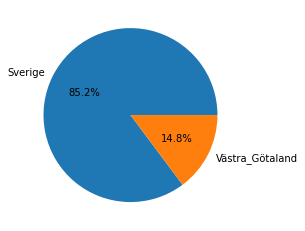

In [62]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("Regional_Daily_Cases.csv")
#input_region = input("Välj en region du vill se, Ops: inga mellan slag och första alfabet vara stor")

df_sverige = df["Sweden_Total_Daily_Cases"].sum()
df_region = df["Västra_Götaland"].sum()
lista = [df_sverige, df_region]
namn = "Sverige", "Västra_Götaland"

plt.pie(lista, labels=namn,autopct='%1.1f%%')
plt.show()

In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("Regional_Totals_Data.csv")

fig = px.scatter(df, x="Cases_per_100k_Pop", y="Total_Cases", color="Region", size='Total_Deaths', size_max=60, title="storleken visar antal döda i en region, antal fall och antal fall per-100k-befolknin på y- och y-axeln", width= 900)# Gneom att skriva df i början av scatter så säger jag till programmet att värderna på x och y-axeln kommet att tas ut från den filen.
fig.show()

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as xp

df = pd.read_csv("Regional_Totals_Data.csv")#läset in csv filen

antal_cases =df.sort_values("Total_Cases")#läser in columnen total-cases från df och sedan sorterar det fårn störst till minst med hjälp 
# om man printar ut antal_cases ser man att man har namnter på region i ordning som värderna på cases, allt jag behöver finns i det nya filen. Därför använder jag mig bara av det till nsäta steg.
cases_barchart = xp.bar(antal_cases, x="Total_Cases", y="Region", title="Antal sjuka i olika regioner", height= 500)# Anäder height för att ändra storleken på barchart
cases_barchart.show()

In [4]:
import plotly.graph_objects as go

df = pd.read_csv("Regional_Totals_Data.csv")
region = df["Region"]
cases = df["Total_Cases"]
döda = df["Total_Deaths"]

fig = go.Figure() #skapar en fig variabel som kommer innehålla grafen

fig.add_trace(go.Bar(
    x = region,
    y = döda,
    name ="Antal döda",
    marker_color = 'rgb(55, 83, 109)'
))# skapat en barchart 

fig.add_trace(go.Bar(
    x=region,
    y= cases,
    name ="Antal fall",
    marker_color = 'rgb(26, 118, 255)'
))# lägger till en barchart till med namnet antall fall
fig.update_layout(title="Antal sjuka och döda i olika reginer", barmode='group', xaxis_tickangle=-45)#uppdaterar fig.figuren som jag hade skapat innnan. bardmode står för att de två barchart ska vara i en graf och inte vara delade
fig.show()

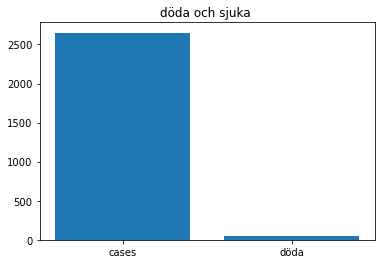

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Regional_Totals_Data.csv")
#stad = "Gotland"

region = df[df["Region"]=="Gotland"]
cases = region["Total_Cases"]
döda = region["Total_Deaths"]

lista = [cases[2], döda[2]]
namn = "cases", "döda"

plt.bar(namn, lista)
plt.title("döda och sjuka ")
plt.show()